<a href="https://colab.research.google.com/github/candido05/DataVis/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 - Visualização de Dados 2023.2

### _Objetivos :_

A análise de dados com gráficos para os dados de bolsas da CAPES de 1995 a 2018 é uma ferramenta poderosa para extrair informações valiosas e compreender tendências e padrões ao longo dos anos.

1. **Identificação de Tendências Temporais:**
   - **Evolução Anual:** Analisar a evolução das bolsas ao longo dos anos pode revelar se houve aumento ou diminuição no número de bolsas concedidas.
   - **Impacto de Políticas:** Avaliar se políticas governamentais ou mudanças na administração da CAPES impactaram a distribuição de bolsas.

2. **Distribuição Geográfica:**
   - **Estados e Municípios:** Analisar a distribuição das bolsas por UF (Unidade Federativa) e Município pode revelar quais regiões foram mais beneficiadas.
   - **Regiões:** Comparar a distribuição entre diferentes regiões do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste, Sul) para entender possíveis desigualdades.

3. **Análise por Programas e Áreas:**
   - **Programas de Fomento:** Avaliar quais programas de fomento receberam mais investimentos.
   - **Áreas de Conhecimento:** Identificar quais áreas de conhecimento e grandes áreas receberam mais bolsas, promovendo o desenvolvimento de certas disciplinas.

4. **Perfil das Instituições:**
   - **IES (Instituições de Ensino Superior):** Analisar a distribuição das bolsas entre diferentes instituições e seus status jurídicos.
   - **Programas de Pós-Graduação:** Identificar quais programas de pós-graduação (Mestrado, Doutorado, etc.) receberam mais bolsas.

5. **Análise dos Tipos de Bolsas:**
   - **Diferentes Modalidades:** Avaliar a distribuição de diferentes tipos de bolsas, como Doutorado Pleno, Iniciação Científica, Mestrado, Pós-Doutorado, etc.
   - **Perfis dos Bolsistas:** Analisar dados relacionados aos coordenadores e pesquisadores visitantes pode fornecer insights sobre o perfil dos bolsistas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/datasets_capes.csv.csv")
data.head()

,Unnamed: 0,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,...,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,Professor IsF,PÓS-DOUTORADO,Total Linha
0,1,2018,AC,RIO BRANCO,NORTE,NaN,DS,UFAC,Federal,NaN,...,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
1,2,2018,AC,RIO BRANCO,NORTE,NaN,ISF,UFAC,Federal,NaN,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,3,2018,AC,RIO BRANCO,NORTE,NaN,PROCAD,UFAC,Federal,NaN,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,4,2018,AC,RIO BRANCO,NORTE,NaN,PVNS,UFAC,Federal,NaN,...,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,5,2018,AC,RIO BRANCO,NORTE,11001011001P8,DS,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,...,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136114 entries, 0 to 136113
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           136114 non-null  int64  
 1   Ano                                  136114 non-null  int64  
 2   UF                                   136114 non-null  object 
 3   Município                            136114 non-null  object 
 4   Região                               136114 non-null  object 
 5   Código Programa                      130415 non-null  object 
 6   Programa Fomento                     136114 non-null  object 
 7   IES                                  136113 non-null  object 
 8   Status Jurídico                      136114 non-null  object 
 9   Programa                             130415 non-null  object 
 10  Área Avaliação                       136114 non-null  object 
 11  Área Conhecim

In [4]:
null_counts = data.isnull().sum()
print(null_counts)

Unnamed: 0                                  0
Ano                                         0
UF                                          0
Município                                   0
Região                                      0
Código Programa                          5699
Programa Fomento                            0
IES                                         1
Status Jurídico                             0
Programa                                 5699
Área Avaliação                              0
Área Conhecimento                           0
Grande Área                                 0
Codigo IES                             125450
Coordenador Geral IsF                   75191
Coordenador Pedagógico IsF              75191
DOUTORADO PLENO                             0
Iniciação Científica                    75191
JOVENS TALENTOS - A                    125450
JOVENS TALENTOS - B                    125450
MESTRADO                                    0
MESTRADO PROFISSIONAL             

In [5]:
df = data.copy()
df.fillna("Desconhecido", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136114 entries, 0 to 136113
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Unnamed: 0                           136114 non-null  int64 
 1   Ano                                  136114 non-null  int64 
 2   UF                                   136114 non-null  object
 3   Município                            136114 non-null  object
 4   Região                               136114 non-null  object
 5   Código Programa                      136114 non-null  object
 6   Programa Fomento                     136114 non-null  object
 7   IES                                  136114 non-null  object
 8   Status Jurídico                      136114 non-null  object
 9   Programa                             136114 non-null  object
 10  Área Avaliação                       136114 non-null  object
 11  Área Conhecimento         

In [6]:
df

,Unnamed: 0,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,...,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,Professor IsF,PÓS-DOUTORADO,Total Linha
0,1,2018,AC,RIO BRANCO,NORTE,Desconhecido,DS,UFAC,Federal,Desconhecido,...,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
1,2,2018,AC,RIO BRANCO,NORTE,Desconhecido,ISF,UFAC,Federal,Desconhecido,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,3,2018,AC,RIO BRANCO,NORTE,Desconhecido,PROCAD,UFAC,Federal,Desconhecido,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,4,2018,AC,RIO BRANCO,NORTE,Desconhecido,PVNS,UFAC,Federal,Desconhecido,...,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,5,2018,AC,RIO BRANCO,NORTE,11001011001P8,DS,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,...,0.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136109,136110,1995,SP,SÃO PAULO,SUDESTE,33019010004P1,DS,FCMSCSP-TI,Privada,MEDICINA (CLÍNICA MÉDICA),...,Desconhecido,3,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,3
136110,136111,1995,SP,SÃO PAULO,SUDESTE,33019010005P8,DS,FCMSCSP-TI,Privada,MEDICINA (TOCOGINECOLOGIA),...,Desconhecido,6,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,6
136111,136112,1995,SP,SÃO PAULO,SUDESTE,33019010006P4,DS,FCMSCSP-TI,Privada,MEDICINA (PEDIATRIA),...,Desconhecido,7,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,12
136112,136113,1995,SP,SÃO PAULO,SUDESTE,33019010007P0,DS,FCMSCSP-TI,Privada,MEDICINA (OTORRINOLARINGOLOGIA),...,Desconhecido,5,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,5


### Identificação de Tendências Temporais:

Quantidade de projetos ao longo dos anos

In [7]:
anos_contagem = df['Ano'].value_counts().sort_index()
print("Quantidade de dados por ano:")
print(anos_contagem)

Quantidade de dados por ano:
Ano
1995     1723
1996     1810
1997     1926
1998     1977
1999     1965
2000     2175
2001     2338
2002     2606
2003     4390
2004     3901
2005     3905
2006     4633
2007     4893
2008     6332
2009     7000
2010     7452
2011     8037
2012     8128
2013     9541
2014     9908
2015    10523
2016     9694
2017    10593
2018    10664
Name: count, dtype: int64


<ipython-input-8-378833fc22e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anos_contagem.index, y=anos_contagem.values, palette='viridis')


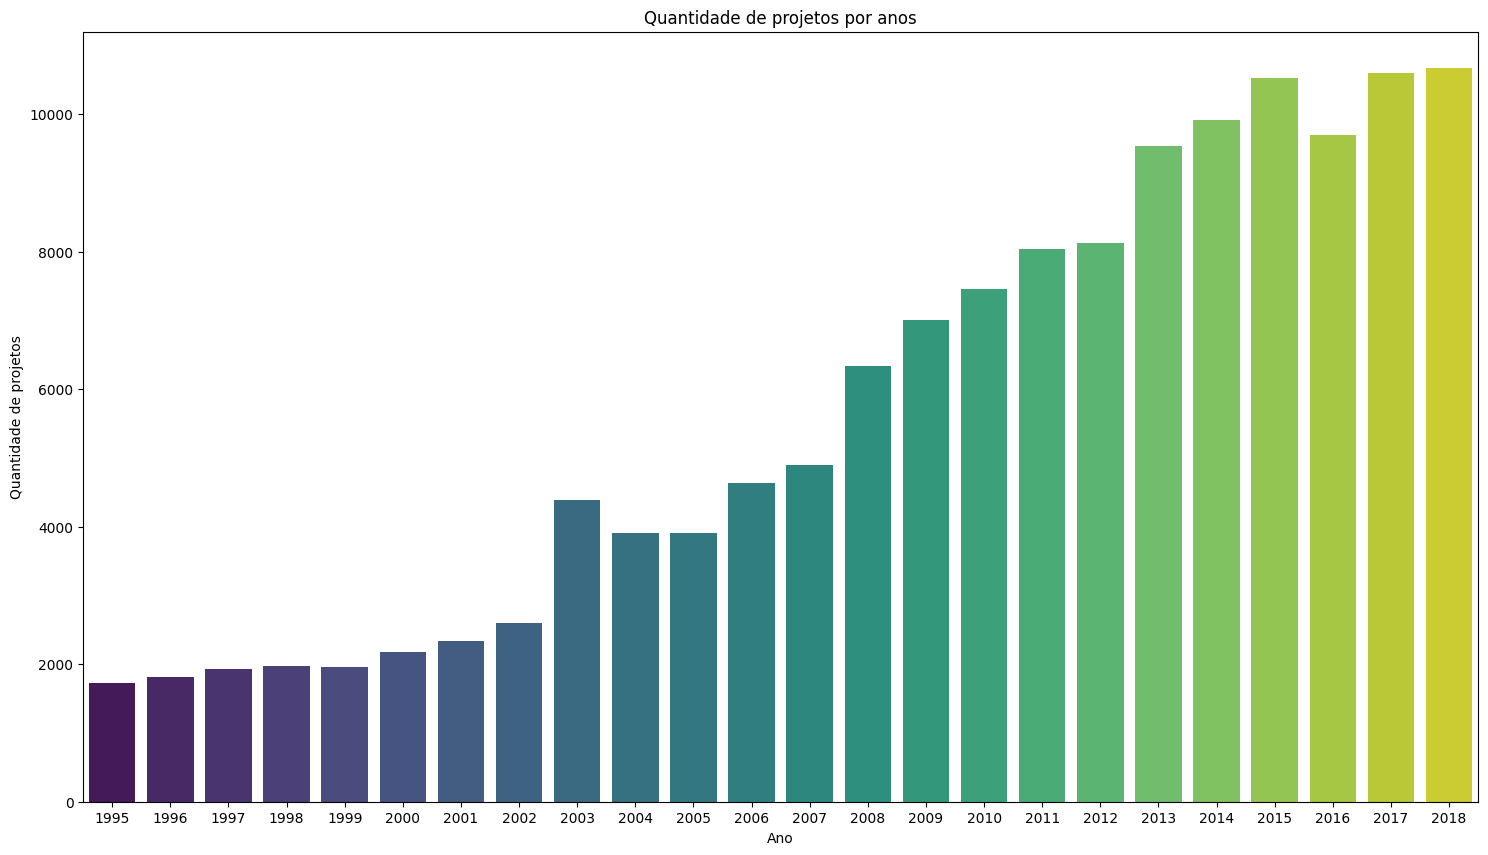

In [8]:
anos_contagem = df['Ano'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(18, 10))
sns.barplot(x=anos_contagem.index, y=anos_contagem.values, palette='viridis')
plt.xlabel('Ano')
plt.ylabel('Quantidade de projetos')
plt.title('Quantidade de projetos por anos')
plt.show()

Distribuição da quantidade de bolsas dentre as instituições de ensino do estado da Paraíba

In [9]:
import re

instituicoes_pb = df[df['UF'] == 'PB']['IES']
def extrair_sigla(nome_instituicao):
    if 'PUC' in nome_instituicao:
        return 'PUC'
    match = re.search(r'\b[A-Z]{2,}\b', nome_instituicao)
    if match:
        return match.group(0)
    return nome_instituicao

instituicoes_pb_padronizadas = instituicoes_pb.apply(extrair_sigla).unique()
quantidade_inst_pb = len(instituicoes_pb_padronizadas)
instituicoes_pb_padronizadas, quantidade_inst_pb

(array(['UFPB', 'UEPB', 'UFCG', 'UNIPÊ', 'IFPB', 'EAF'], dtype=object), 6)

In [10]:
inst = instituicoes_pb.apply(extrair_sigla)
inst_valores = inst.value_counts()
inst_valores

IES
UFPB     2710
UFCG     1077
UEPB      350
IFPB       86
UNIPÊ      17
EAF         8
Name: count, dtype: int64

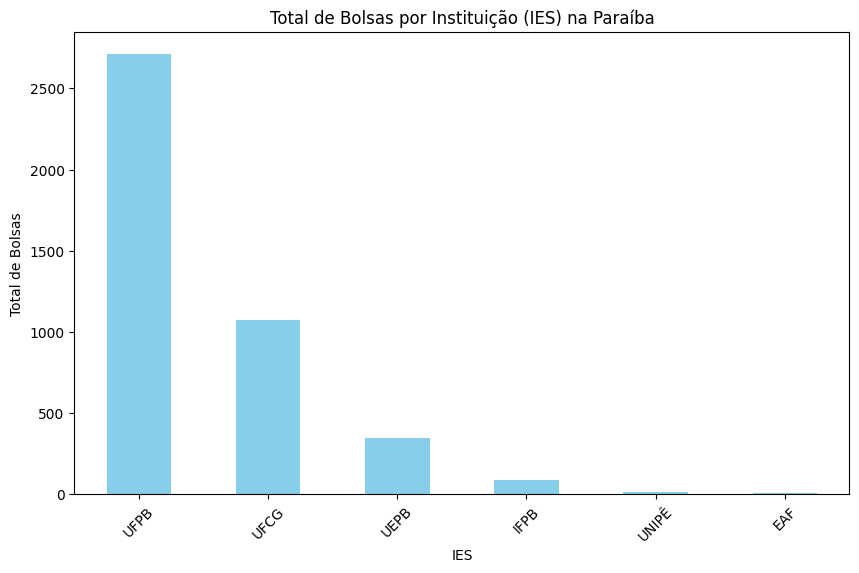

In [11]:
plt.figure(figsize=(10, 6))
inst_valores.plot(kind='bar', color='skyblue')
plt.xlabel('IES')
plt.ylabel('Total de Bolsas')
plt.title('Total de Bolsas por Instituição (IES) na Paraíba')
plt.xticks(rotation=45)
plt.show()

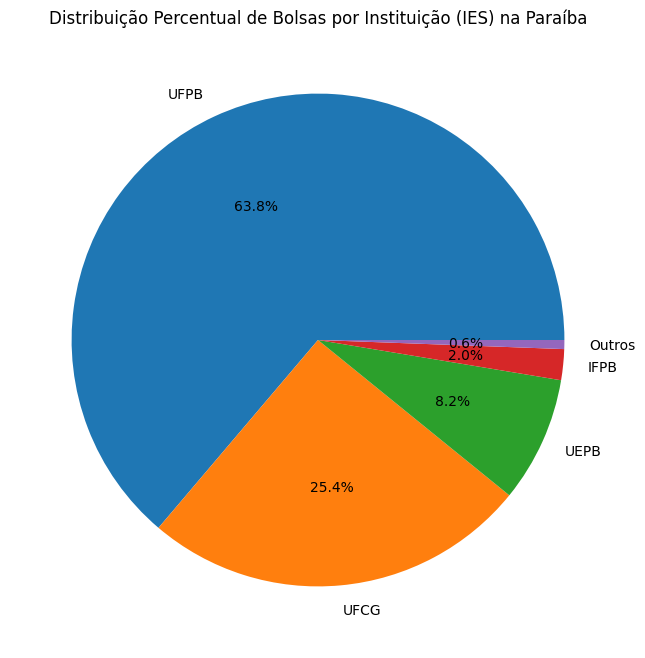

In [12]:
limiar = 20
small_values = inst_valores[inst_valores < limiar]
large_values = inst_valores[inst_valores >= limiar]
combined_values = pd.concat([large_values, pd.Series({'Outros': small_values.sum()})])
filtered_values = combined_values[combined_values > 0]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 8))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribuição Percentual de Bolsas por Instituição (IES) na Paraíba')
plt.ylabel('')
plt.show()

<ipython-input-13-8fc002d0efbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pb['IES_Limpa'] = df_pb['IES'].apply(extrair_sigla)


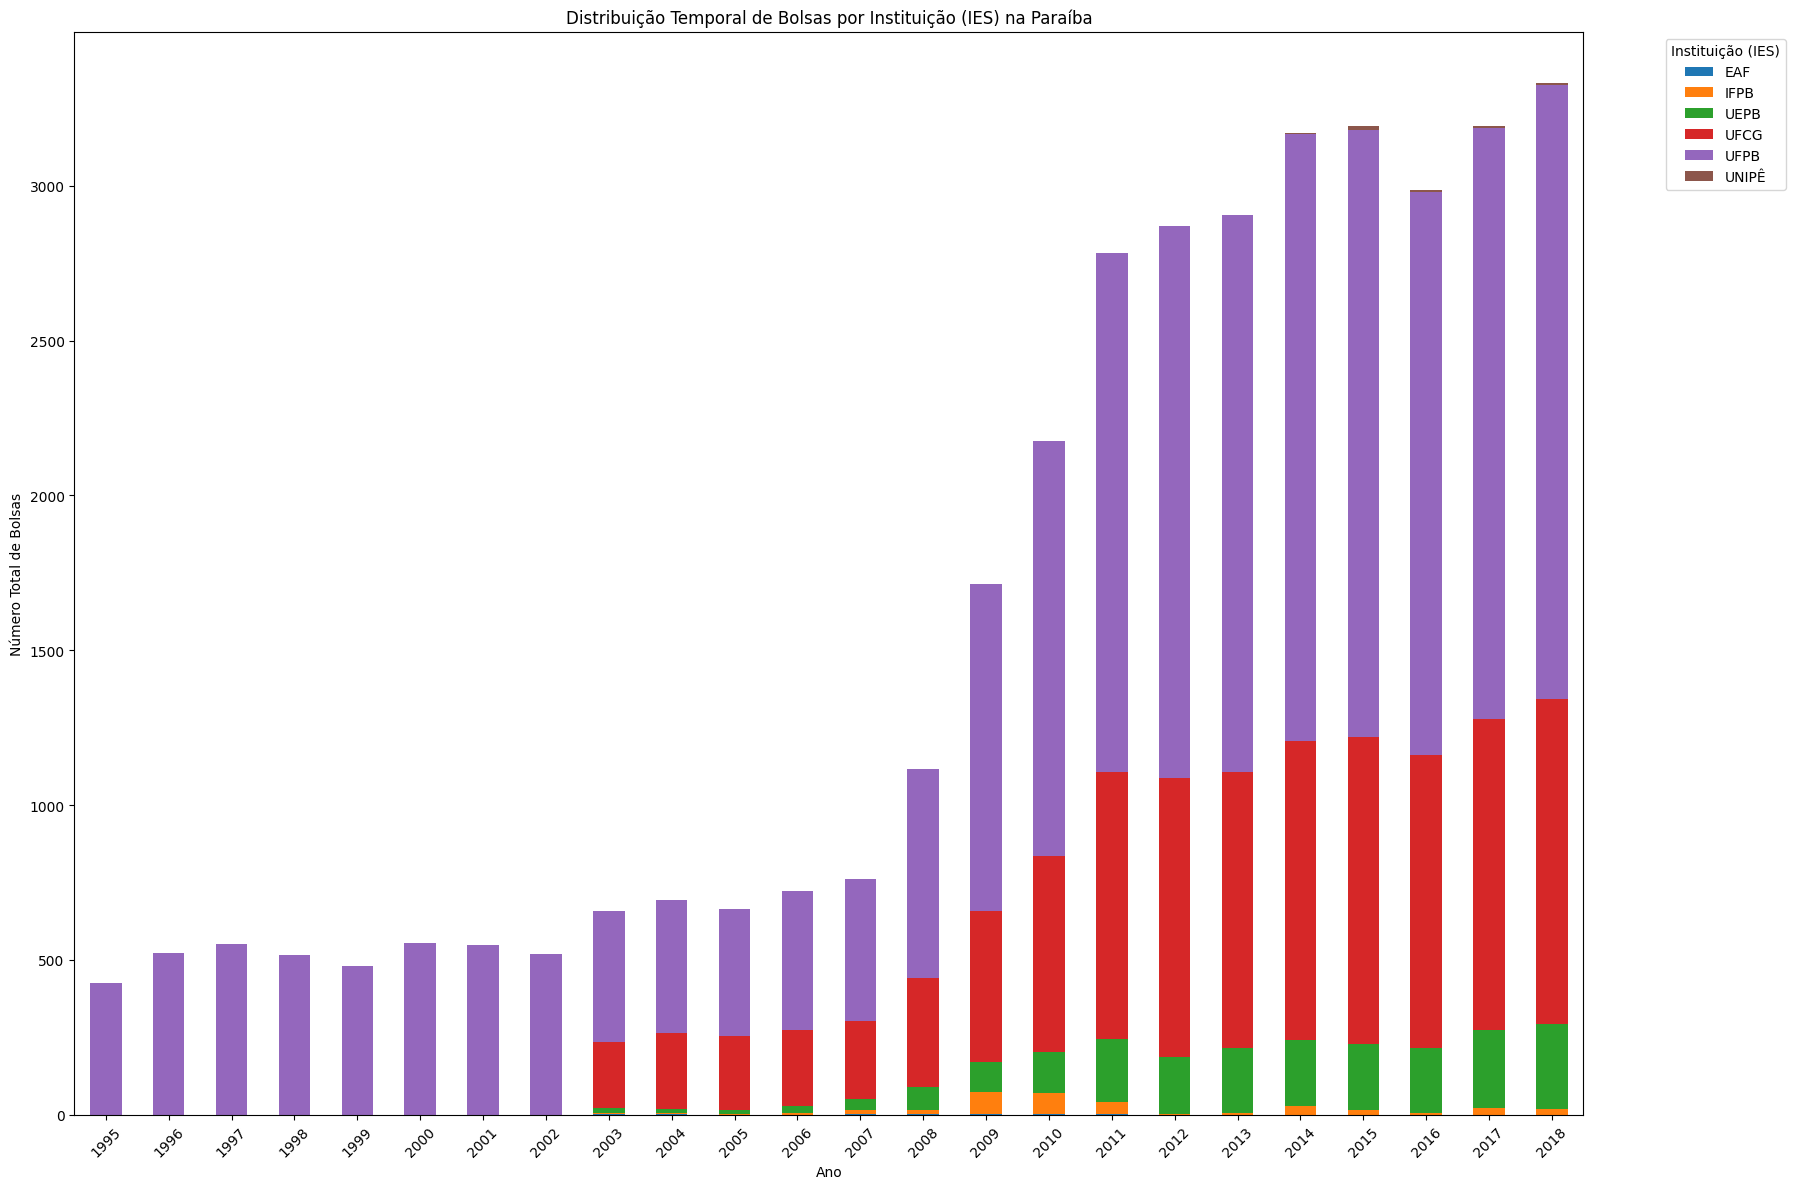

In [13]:
df_pb = df[df['UF'] == 'PB']
df_pb['IES_Limpa'] = df_pb['IES'].apply(extrair_sigla)
grouped = df_pb.groupby(['Ano', 'IES_Limpa'])['Total Linha'].sum().reset_index()
pivot_table = grouped.pivot_table(index='Ano', columns='IES_Limpa', values='Total Linha', aggfunc='sum')

fig, ax = plt.subplots(figsize=(18, 12))
pivot_table.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Ano')
plt.ylabel('Número Total de Bolsas')
plt.title('Distribuição Temporal de Bolsas por Instituição (IES) na Paraíba')
plt.xticks(rotation=45)
plt.legend(title='Instituição (IES)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Distribuição Geográfica

Distribuição entre os estados do Brasil

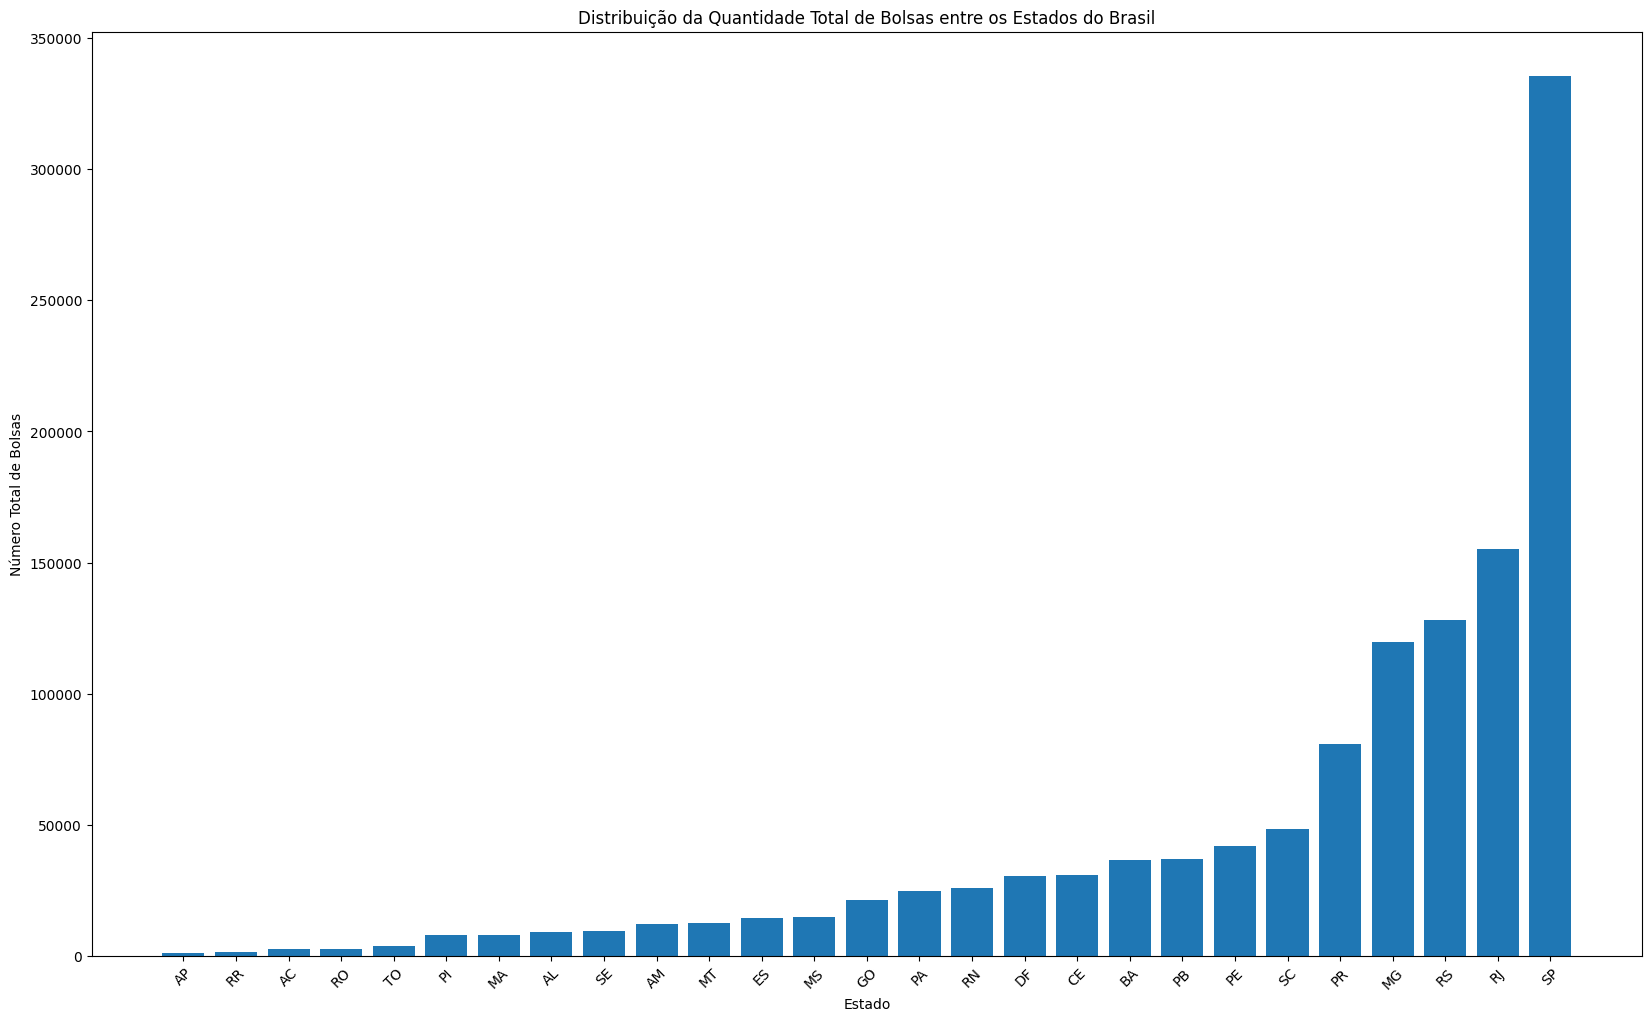

In [14]:
total_estados = df.groupby('UF')['Total Linha'].sum().reset_index()
total_estados = total_estados.sort_values(by="Total Linha", ascending=True)
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(total_estados['UF'], total_estados['Total Linha'])
plt.xlabel('Estado')
plt.ylabel('Número Total de Bolsas')
plt.title('Distribuição da Quantidade Total de Bolsas entre os Estados do Brasil')
plt.xticks(rotation=45)
plt.show()

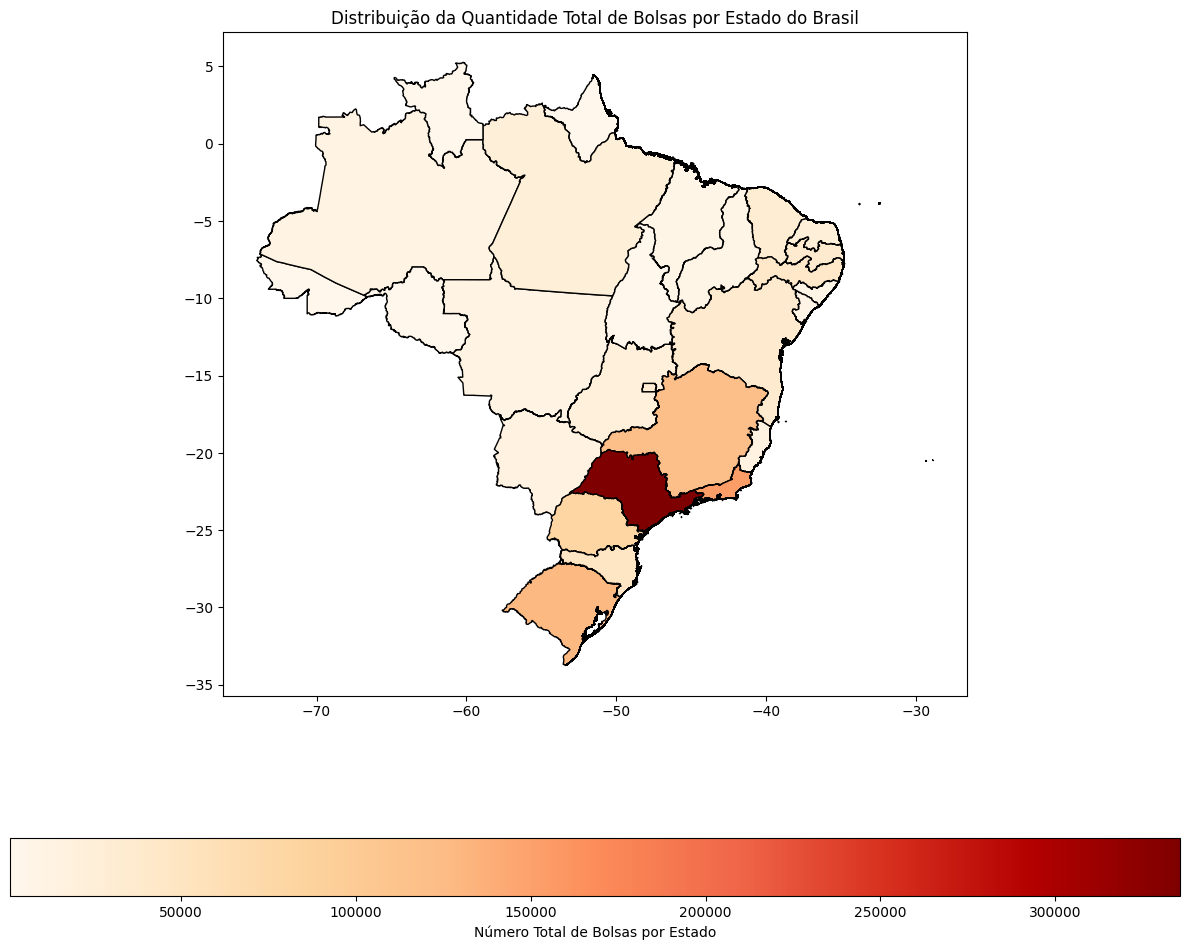

In [15]:
import geopandas as gpd

gdf = gpd.read_file('/content/brazil_geo.json')
gdf = gdf.rename(columns={'id': 'UF'})
merged = gdf.merge(total_estados, on='UF')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Total Linha', ax=ax, legend=True,
            legend_kwds={'label': "Número Total de Bolsas por Estado",
                         'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

plt.title('Distribuição da Quantidade Total de Bolsas por Estado do Brasil')
plt.tight_layout()
plt.grid(False)
plt.show()

Distribuição entre os estados do Nordestre

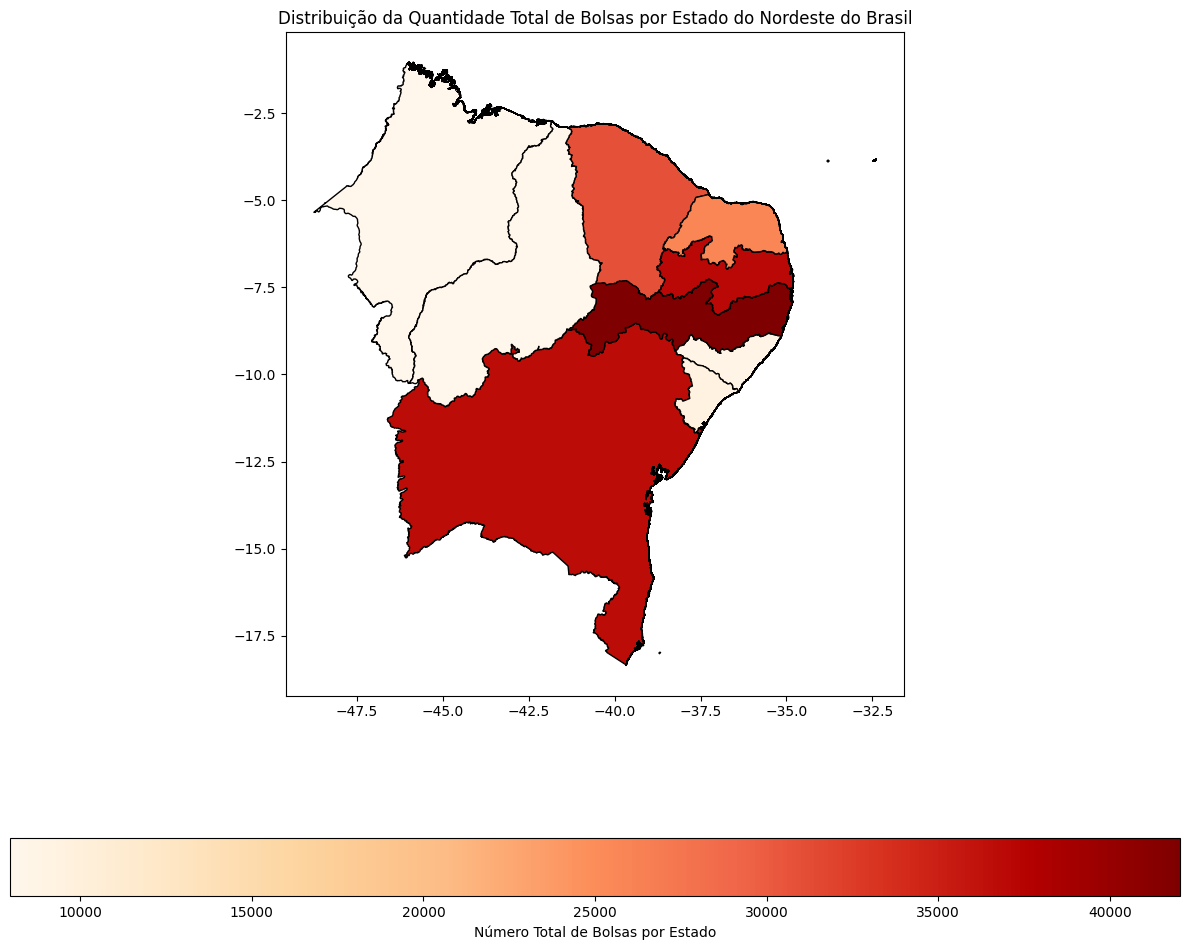

In [16]:
estados_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']

gdf = gdf.rename(columns={'id': 'UF'})
df_nordeste = df[df['UF'].isin(estados_nordeste)]
total_estados = df_nordeste.groupby('UF')['Total Linha'].sum().reset_index()
merged = gdf.merge(total_estados, on='UF')
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Total Linha', ax=ax, legend=True,
            legend_kwds={'label': "Número Total de Bolsas por Estado",
                         'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

plt.title('Distribuição da Quantidade Total de Bolsas por Estado do Nordeste do Brasil')
plt.tight_layout()
plt.grid(False)
plt.show()

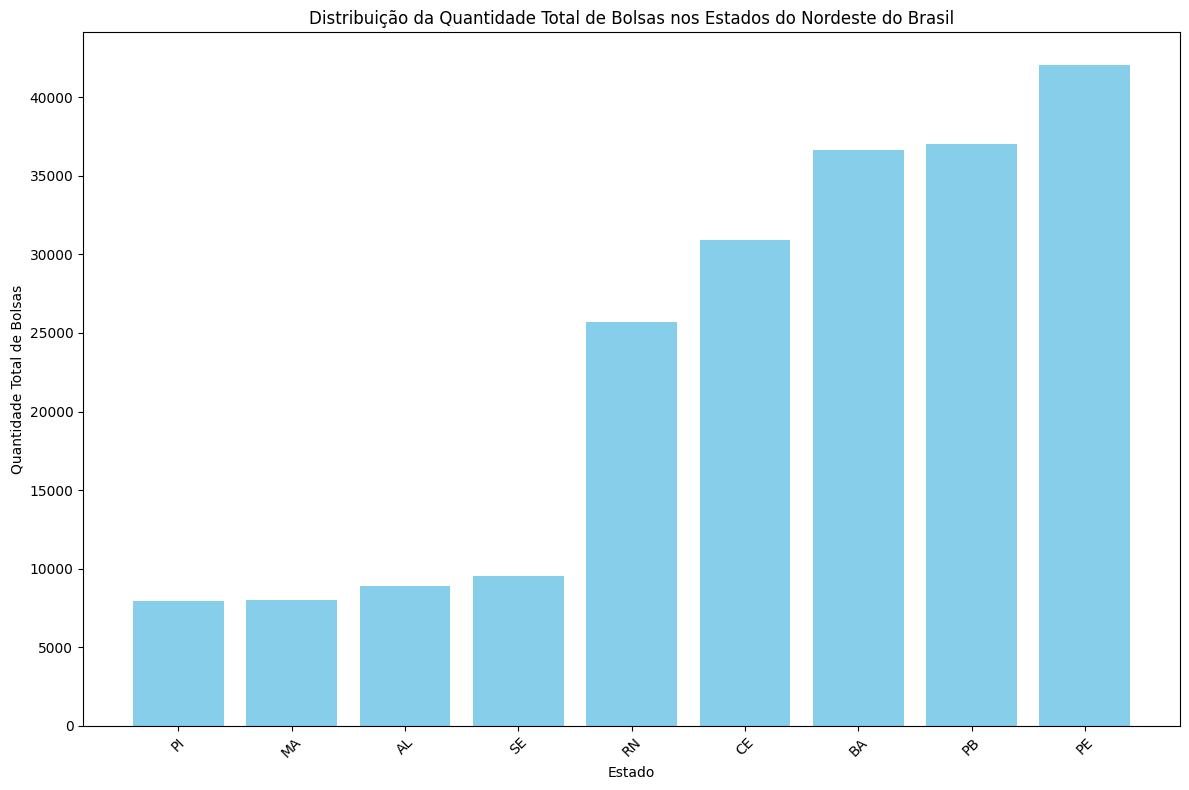

In [17]:
nordeste_states = ['BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE', 'AL']
df_nordeste = df[df['UF'].isin(nordeste_states)]
grouped_nordeste = df_nordeste.groupby('UF')['Total Linha'].sum().reset_index()
grouped_nordeste = grouped_nordeste.sort_values(by='Total Linha', ascending=True)


plt.figure(figsize=(12, 8))
plt.bar(grouped_nordeste['UF'], grouped_nordeste['Total Linha'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Quantidade Total de Bolsas')
plt.title('Distribuição da Quantidade Total de Bolsas nos Estados do Nordeste do Brasil')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

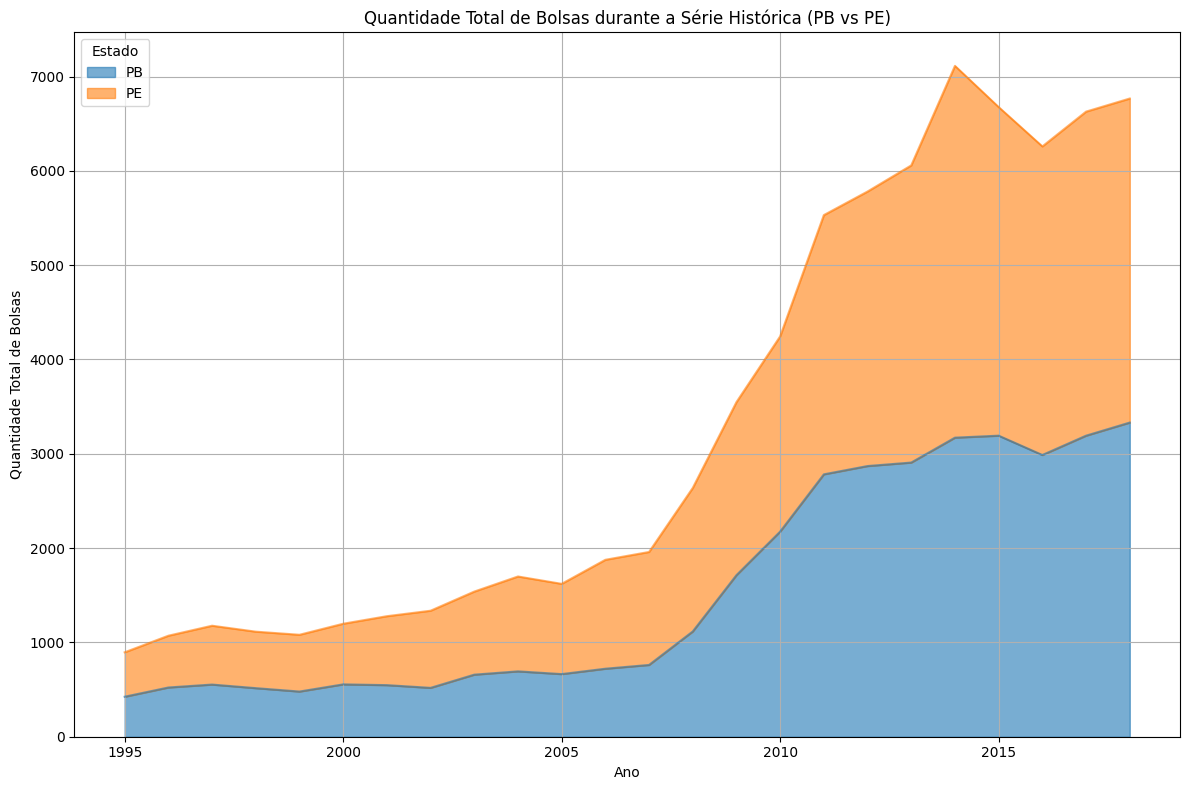

In [18]:
df_pb_ba = df[df['UF'].isin(['PB', 'PE'])]
grouped_pb_ba = df_pb_ba.groupby(['Ano', 'UF'])['Total Linha'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
grouped_pb_ba.plot(kind='area', stacked=True, alpha=0.6, ax=plt.gca())
plt.xlabel('Ano')
plt.ylabel('Quantidade Total de Bolsas')
plt.title('Quantidade Total de Bolsas durante a Série Histórica (PB vs PE)')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribuição entre as Regiões

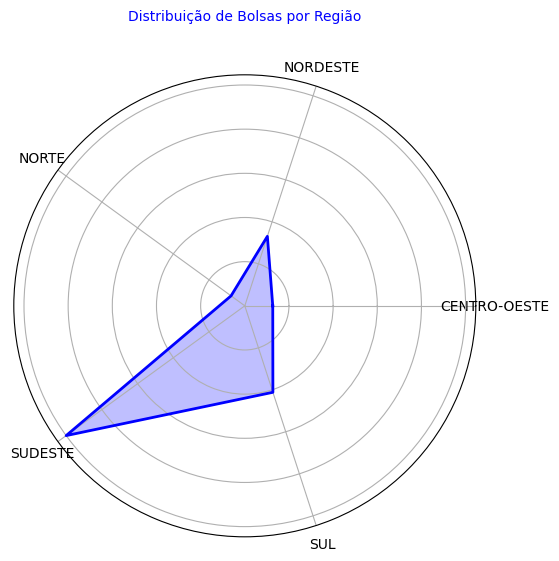

In [19]:
bolsas_por_regiao = df.groupby('Região')['Total Linha'].sum()
max_value = bolsas_por_regiao.max()
bolsas_normalizadas = bolsas_por_regiao / max_value

labels = bolsas_normalizadas.index
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = bolsas_normalizadas.tolist()
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, values, color='b', alpha=0.25)
ax.plot(angles, values, color='b', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Distribuição de Bolsas por Região', size=10, color='b', y=1.1)
plt.show()

In [20]:
import plotly.express as px

bolsas_por_regiao = df.groupby('Região')['Total Linha'].sum()
df_treemap = bolsas_por_regiao.reset_index()
df_treemap.columns = ['Região', 'Quantidade']
df_treemap['Porcentagem'] = 100 * df_treemap['Quantidade'] / df_treemap['Quantidade'].sum()


fig = px.treemap(df_treemap, path=['Região'], values='Quantidade',
                 color='Porcentagem',
                 color_continuous_scale='Blues',
                 title='Distribuição de Bolsas por Região',
                 labels={'Quantidade': 'Quantidade Bruta', 'Porcentagem': 'Porcentagem'})

# Atualizar os rótulos e a descrição do hover
fig.update_traces(
    textinfo='label+percent entry+value',  # Exibe label, percentual e valor
    hovertemplate='<b>%{label}</b><br>Quantidade: %{value}<br>Porcentagem: %{color:.1f}%<extra></extra>'  # Ajuste do hover template
)

# Ajustar o layout
fig.update_layout(
    margin=dict(t=50, b=150, l=0, r=0)  # Ajuste as margens para dar espaço para a legenda
)
fig.show()

### Distribuição entre os Municípios

In [21]:
capitais = [
    'RIO BRANCO', 'MACEIÓ', 'MANAUS', 'SALVADOR', 'FORTALEZA',
    'BRASÍLIA', 'VITÓRIA', 'GOIÂNIA', 'SÃO LUÍS', 'CUIABÁ',
    'CAMPO GRANDE', 'BELO HORIZONTE', 'BELÉM', 'JOÃO PESSOA',
    'RECIFE', 'TERESINA', 'SÃO PAULO', 'ARACAJU', 'PALMAS',
    'MACAPÁ', 'BOA VISTA'
]

df['Município'] = df['Município'].str.upper()
df['Categoria'] = df['Município'].apply(lambda x: 'Capital' if x in capitais else 'Interior')
bolsas_por_categoria = df.groupby('Categoria')['Total Linha'].sum().reset_index()

fig = px.pie(
    bolsas_por_categoria,
    values='Total Linha',
    names='Categoria',
    title='Distribuição de Bolsas: Capitais vs Interior',
    labels={'Total Linha': 'Quantidade de Bolsas'},
    color='Categoria',
    color_discrete_map={'Capital': 'red', 'Interior': 'blue'}
)
fig.update_traces(
    textinfo='label+percent+value',
    hovertemplate='<b>%{label}</b><br>Quantidade: %{value}<br>Porcentagem: %{percent:.1f}%<extra></extra>'
)
fig.show()

In [22]:
capitais_nordeste = [
    'SÃO LUÍS', 'TERESINA', 'FORTALEZA', 'NATAL', 'JOÃO PESSOA',
    'RECIFE', 'MACEIÓ', 'ARACAJU', 'SALVADOR'
]

df['Município'] = df['Município'].str.upper()
df_nordeste = df[df['Região'] == 'NORDESTE']
df_nordeste['Município'] = df_nordeste['Município'].str.upper()
df_nordeste['Categoria'] = df_nordeste['Município'].apply(lambda x: 'Capital' if x in capitais_nordeste else 'Interior')
bolsas_por_categoria = df_nordeste.groupby('Categoria')['Total Linha'].sum().reset_index()

fig = px.pie(
    bolsas_por_categoria,
    values='Total Linha',
    names='Categoria',
    title='Distribuição de Bolsas no Nordeste: Capitais vs Interior',
    labels={'Total Linha': 'Quantidade de Bolsas'},
    color='Categoria',
    color_discrete_map={'Capital': 'red', 'Interior': 'blue'}
)
fig.update_traces(
    textinfo='label+percent+value',
    hovertemplate='<b>%{label}</b><br>Quantidade: %{value}<br>Porcentagem: %{percent:.1f}%<extra></extra>'
)
fig.show()

<ipython-input-22-facc4c07ceb0>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-facc4c07ceb0>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Análise por Programas e Áreas na UFPB:

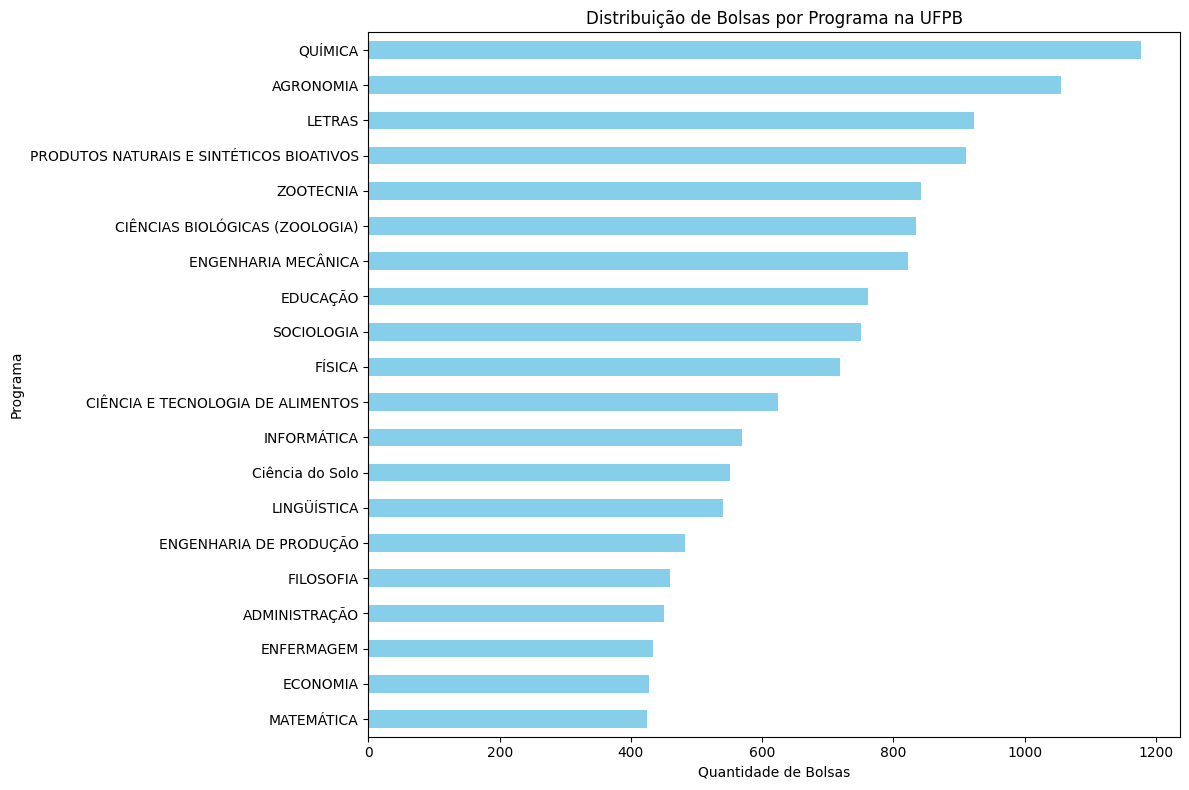

In [23]:
df_ufpb = df[df['IES'].apply(extrair_sigla) == 'UFPB']
df_ufpb = df_ufpb[df_ufpb['Programa'] != 'Desconhecido']
programas_ufpb = df_ufpb.groupby('Programa')['Total Linha'].sum().sort_values(ascending=False)
top_10_programas_ufpb = programas_ufpb[:20]

plt.figure(figsize=(12, 8))
top_10_programas_ufpb.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribuição de Bolsas por Programa na UFPB')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Programa')
plt.tight_layout()
plt.show()

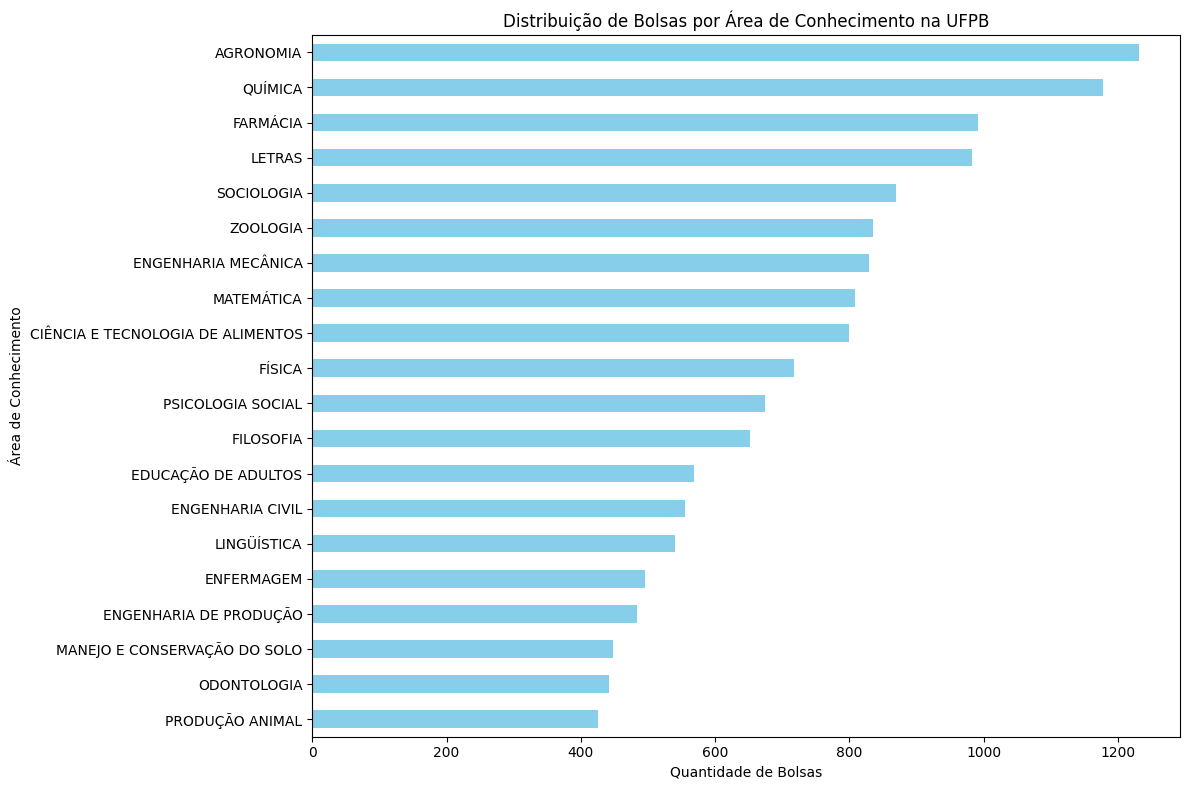

In [24]:
df_ufpb = df[df['IES'].apply(extrair_sigla) == 'UFPB']
df_ufpb = df_ufpb[df_ufpb['Área Conhecimento'] != 'Área Não Informada']
areas_conhecimento_ufpb = df_ufpb.groupby('Área Conhecimento')['Total Linha'].sum().sort_values(ascending=False)
top_10_areas_conhecimento_ufpb = areas_conhecimento_ufpb[:20]

plt.figure(figsize=(12, 8))
top_10_areas_conhecimento_ufpb.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribuição de Bolsas por Área de Conhecimento na UFPB')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Área de Conhecimento')
plt.tight_layout()
plt.show()

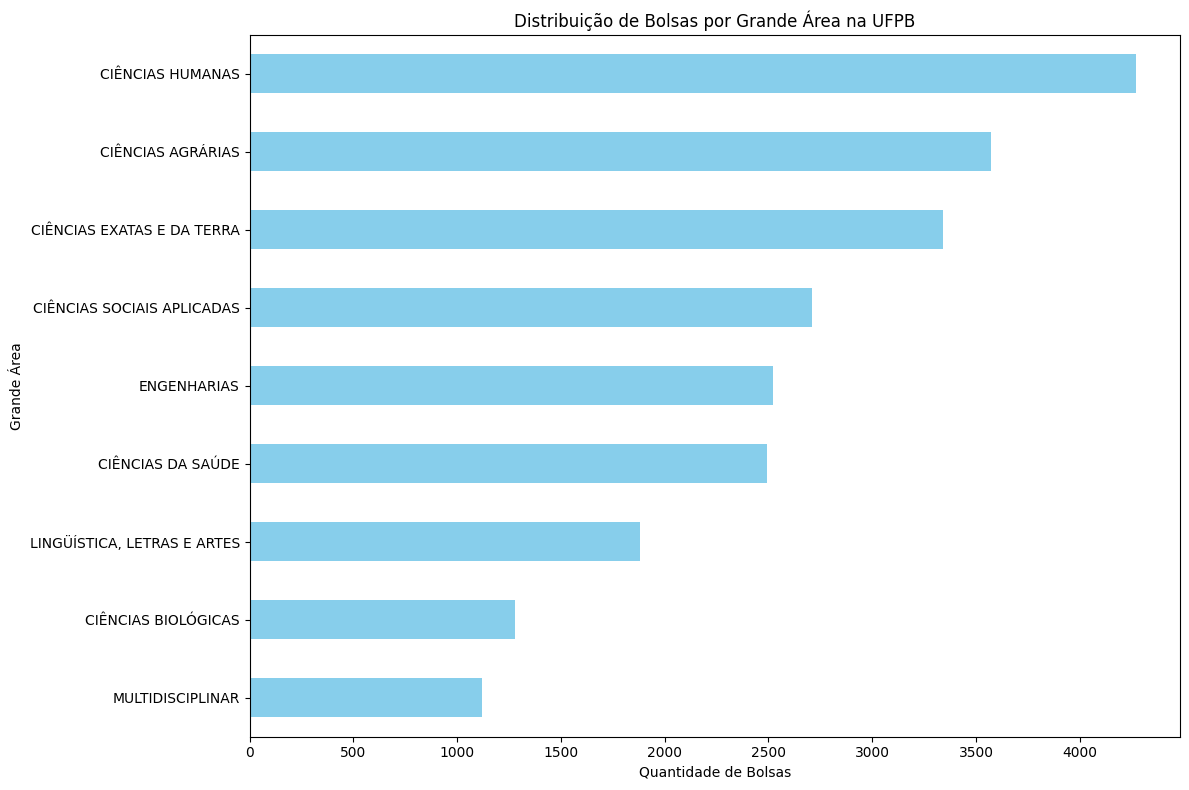

In [25]:
df_ufpb = df[df['IES'].apply(extrair_sigla) == 'UFPB']
df_ufpb = df_ufpb[df_ufpb['Grande Área'] != 'Grande Area Não Informada']
grande_areas_ufpb = df_ufpb.groupby('Grande Área')['Total Linha'].sum().sort_values(ascending=False)
top_10_grande_areas_ufpb = grande_areas_ufpb[:10]

plt.figure(figsize=(12, 8))
top_10_grande_areas_ufpb.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribuição de Bolsas por Grande Área na UFPB')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Grande Área')
plt.tight_layout()
plt.show()

## Perfil das Instituições

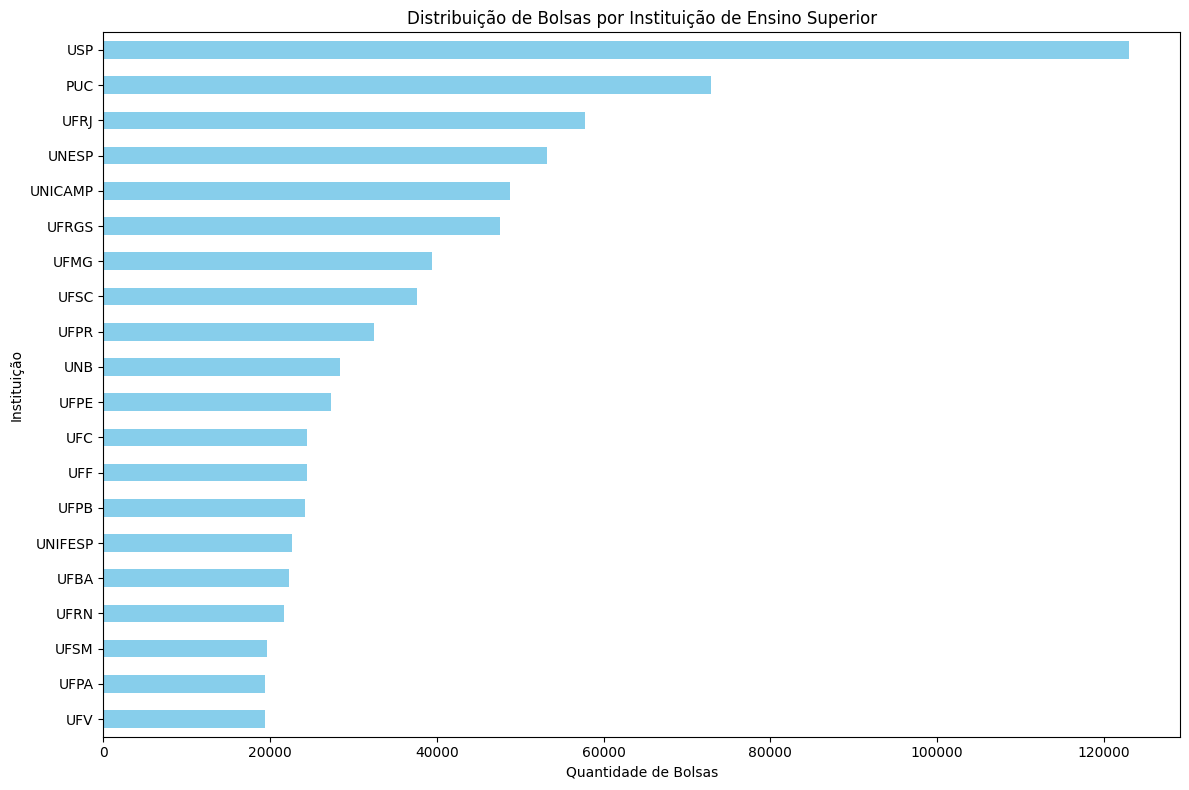

In [26]:
df['IES_Sigla'] = df['IES'].apply(extrair_sigla)
instituicoes_bolsas = df.groupby('IES_Sigla')['Total Linha'].sum().sort_values(ascending=False)
top_20_instituicoes = instituicoes_bolsas.head(20)

plt.figure(figsize=(12, 8))
top_20_instituicoes.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribuição de Bolsas por Instituição de Ensino Superior')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Instituição')
plt.tight_layout()
plt.show()

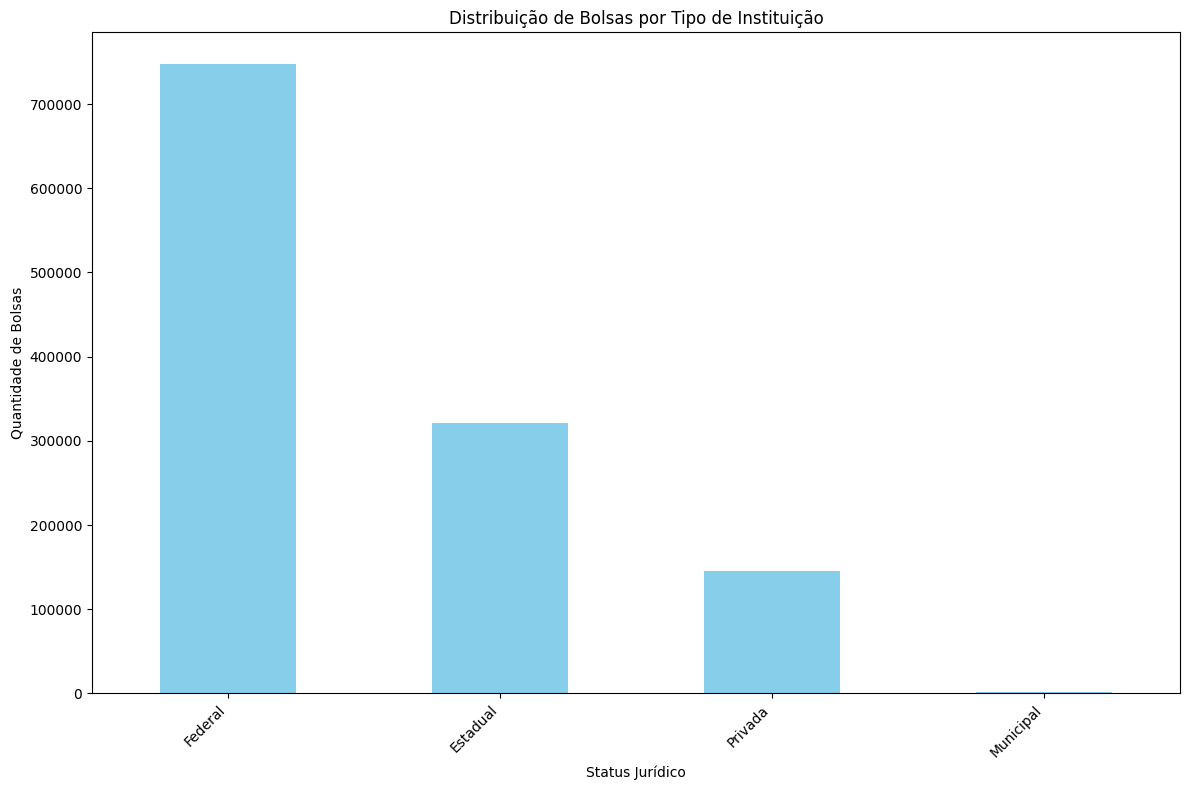

In [27]:
status_juridico_bolsas = df.groupby('Status Jurídico')['Total Linha'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
status_juridico_bolsas.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Bolsas por Tipo de Instituição')
plt.xlabel('Status Jurídico')
plt.ylabel('Quantidade de Bolsas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Análise dos Tipos de Bolsas

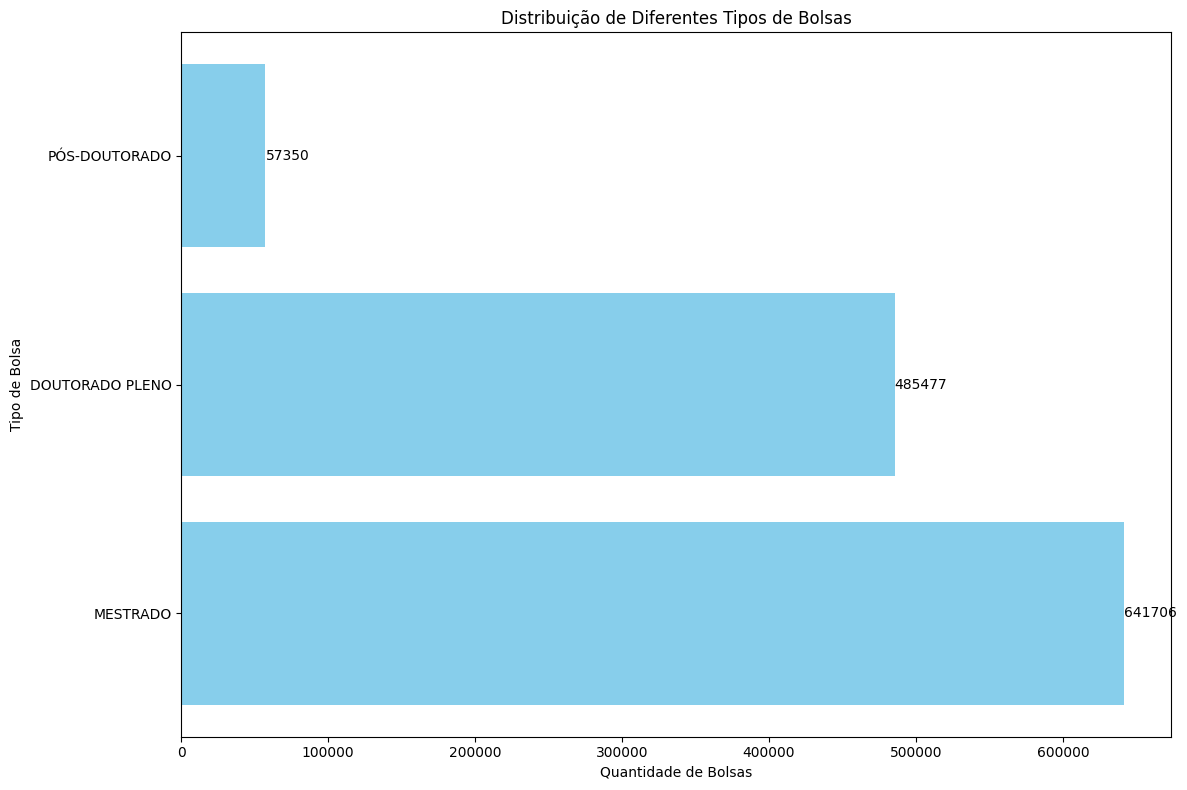

In [28]:
tipos_bolsa = [
    'DOUTORADO PLENO',
    'MESTRADO',
    'PÓS-DOUTORADO'
]

for tipo in tipos_bolsa:
    df[tipo] = pd.to_numeric(df[tipo], errors='coerce').fillna(0).astype(int)
bolsas_por_tipo = {tipo: df[tipo].sum() for tipo in tipos_bolsa}
df_bolsas_por_tipo = pd.DataFrame(list(bolsas_por_tipo.items()), columns=['Tipo de Bolsa', 'Quantidade'])
df_bolsas_por_tipo = df_bolsas_por_tipo.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(df_bolsas_por_tipo['Tipo de Bolsa'], df_bolsas_por_tipo['Quantidade'], color="skyblue")
plt.title('Distribuição de Diferentes Tipos de Bolsas')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Tipo de Bolsa')

for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
plt.tight_layout()
plt.show()

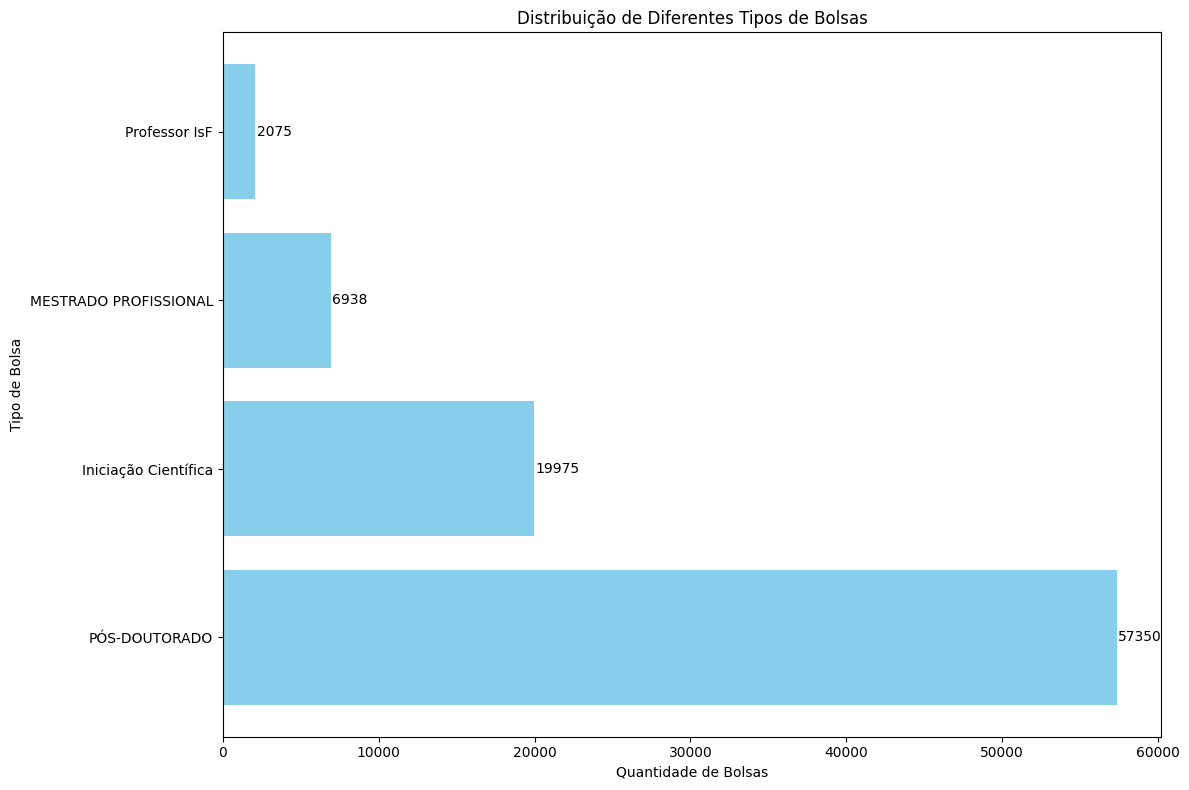

In [29]:
tipos_bolsa = [
    'Iniciação Científica',
    'MESTRADO PROFISSIONAL',
    'Professor IsF',
    'PÓS-DOUTORADO'
]

for tipo in tipos_bolsa:
    df[tipo] = pd.to_numeric(df[tipo], errors='coerce').fillna(0).astype(int)
bolsas_por_tipo = {tipo: df[tipo].sum() for tipo in tipos_bolsa}
df_bolsas_por_tipo = pd.DataFrame(list(bolsas_por_tipo.items()), columns=['Tipo de Bolsa', 'Quantidade'])
df_bolsas_por_tipo = df_bolsas_por_tipo.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(df_bolsas_por_tipo['Tipo de Bolsa'], df_bolsas_por_tipo['Quantidade'], color="skyblue")
plt.title('Distribuição de Diferentes Tipos de Bolsas')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Tipo de Bolsa')
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')
plt.tight_layout()
plt.show()

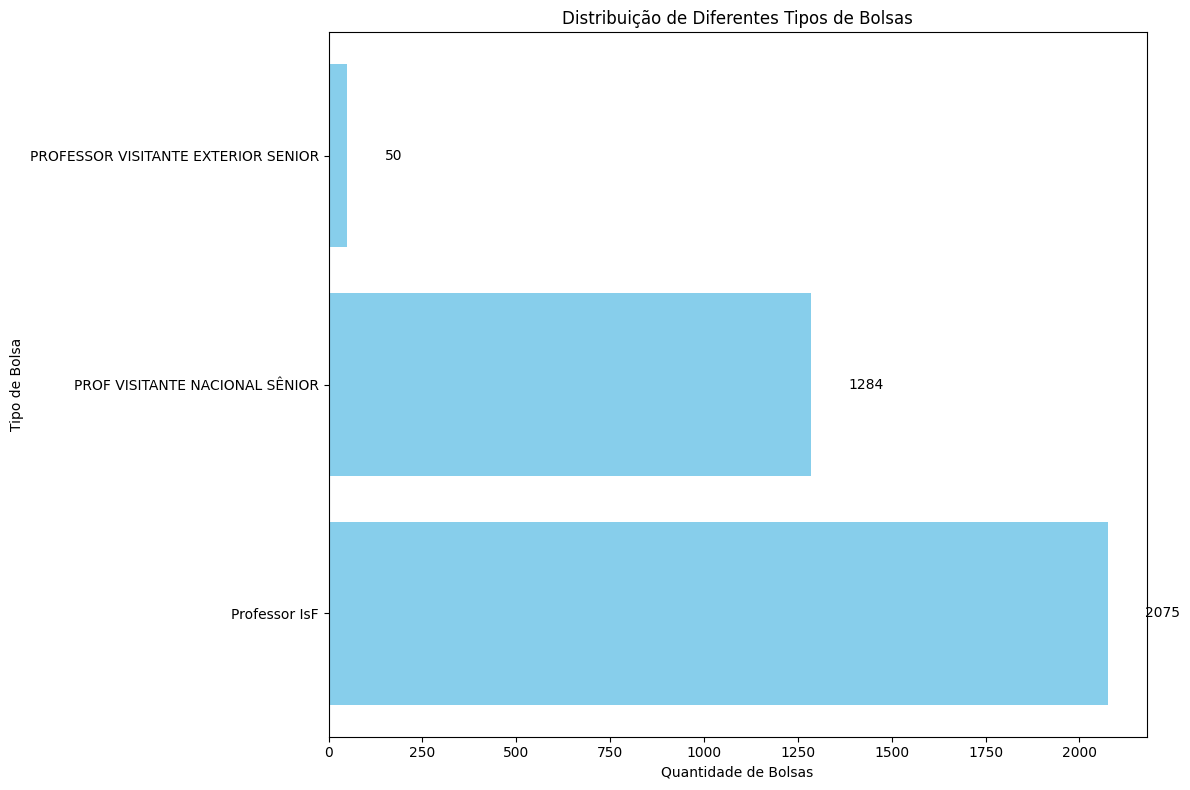

In [30]:
tipos_bolsa = [
    'PROF VISITANTE NACIONAL SÊNIOR',
    'PROFESSOR VISITANTE EXTERIOR SENIOR',
    'Professor IsF'
]

for tipo in tipos_bolsa:
    df[tipo] = pd.to_numeric(df[tipo], errors='coerce').fillna(0).astype(int)
bolsas_por_tipo = {tipo: df[tipo].sum() for tipo in tipos_bolsa}
df_bolsas_por_tipo = pd.DataFrame(list(bolsas_por_tipo.items()), columns=['Tipo de Bolsa', 'Quantidade'])
df_bolsas_por_tipo = df_bolsas_por_tipo.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(df_bolsas_por_tipo['Tipo de Bolsa'], df_bolsas_por_tipo['Quantidade'], color="skyblue")
plt.title('Distribuição de Diferentes Tipos de Bolsas')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Tipo de Bolsa')

for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', ha='left')

plt.tight_layout()
plt.show()

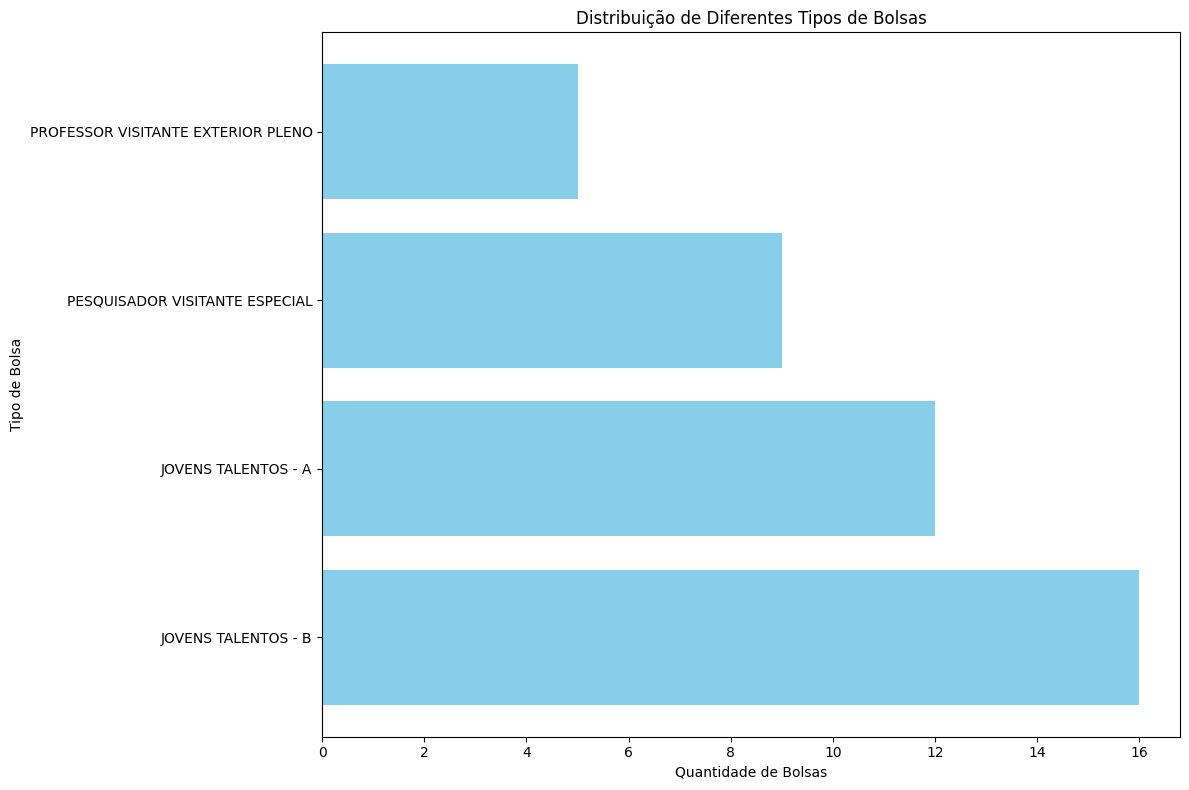

In [31]:
tipos_bolsa = [
    'JOVENS TALENTOS - A',
    'JOVENS TALENTOS - B',
    'PESQUISADOR VISITANTE ESPECIAL',
    'PROFESSOR VISITANTE EXTERIOR PLENO'
]

for tipo in tipos_bolsa:
    df[tipo] = pd.to_numeric(df[tipo], errors='coerce').fillna(0).astype(int)

bolsas_por_tipo = {tipo: df[tipo].sum() for tipo in tipos_bolsa}
df_bolsas_por_tipo = pd.DataFrame(list(bolsas_por_tipo.items()), columns=['Tipo de Bolsa', 'Quantidade'])
df_bolsas_por_tipo = df_bolsas_por_tipo.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(df_bolsas_por_tipo['Tipo de Bolsa'], df_bolsas_por_tipo['Quantidade'], color="skyblue")
plt.title('Distribuição de Diferentes Tipos de Bolsas')
plt.xlabel('Quantidade de Bolsas')
plt.ylabel('Tipo de Bolsa')


plt.tight_layout()
plt.show()